In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))
lsl_dr.head()

,redcap_event_name,academic_year_rv,hl,male,_race,prim_lang,sib,_mother_ed,father_ed,par1_ed,...,gf3_sis_ss,gf3_siw_ss,gf_version,ppvt_f,ppvt_ss,rowpvt_ss,school,score,test_name,test_type
0,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,58.0,NaN,EOWPVT
1,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,51.0,PLS,receptive
2,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,60.0,PLS,expressive
3,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,54.0,PLS,total
4,initial_assessment_arm_1,2011.0,0.0,0.0,2.0,0.0,1.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,626,50.0,PLS,receptive


In [3]:
lsl_dr.domain.value_counts()

Language                 37578
Receptive Vocabulary     10431
Expressive Vocabulary    10089
Articulation              6966
Name: domain, dtype: int64

## Add column to LSL-DR dataset

In [4]:
lsl_dr['score_adj'] = lsl_dr.score.copy()

# Receptive vocabulary

Model:

    
    t_ss ~ rowpvt_ss + age_test_rowpvt + sex + lang_cat + onset_1 + age_amp + age + sib

In [5]:
receptive_vocabulary_data = lsl_dr.query('domain=="Receptive Vocabulary"')

In [6]:
regression_subset = receptive_vocabulary_data[['rowpvt_ss', 'ppvt_ss', 'age_test_rowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [7]:
X = regression_subset.copy()
y = X.pop('ppvt_ss')

In [8]:
receptive_vocab_model = linear_model.LinearRegression()
receptive_vocab_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
X_pred = receptive_vocabulary_data.loc[receptive_vocabulary_data.ppvt_ss.isnull(), ['rowpvt_ss', 'age_test_rowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

rowpvt_ss          90.196375
age_test_rowpvt    61.527470
non_english         0.260632
age_amp            15.992282
age                29.366130
sib                 1.201238
female              0.512083
dtype: float64

In [10]:
X_pred = X_pred.fillna(X_pred.mean())

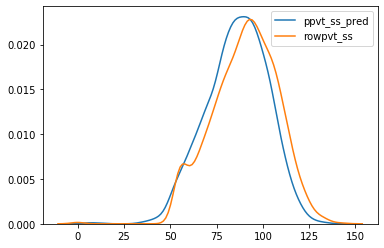

In [11]:
ppvt_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(ppvt_ss_pred, label='ppvt_ss_pred')
sns.kdeplot(X_pred.rowpvt_ss);

Add values to table

In [14]:
ppvt_ss_pred = pd.Series(ppvt_ss_pred, index=X_pred.index)

In [18]:
lsl_dr.loc[ppvt_ss_pred.index, 'score_adj'] = ppvt_ss_pred

# Expressive vocabulary

Model:

    evt_ss ~ eowpvt_ss + age_test_eowpvt + sex + 
                        lang_cat + onset_1 + age_amp + age + sib

In [19]:
expressive_vocabulary_data = lsl_dr.query('domain=="Expressive Vocabulary"')

In [20]:
regression_subset = expressive_vocabulary_data[['evt_ss', 'eowpvt_ss', 'age_test_eowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [21]:
X = regression_subset.copy()
y = X.pop('evt_ss')

In [22]:
expressive_vocab_model = linear_model.LinearRegression()
expressive_vocab_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
X_pred = expressive_vocabulary_data.loc[expressive_vocabulary_data.evt_ss.isnull(), ['eowpvt_ss', 'age_test_eowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

eowpvt_ss          88.186816
age_test_eowpvt    62.422010
non_english         0.231745
age_amp            15.940184
age                29.914061
sib                 1.206345
female              0.508304
dtype: float64

In [24]:
X_pred = X_pred.fillna(X_pred.mean())

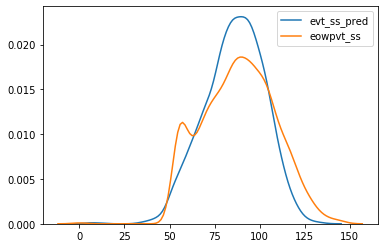

In [25]:
evt_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(ppvt_ss_pred, label='evt_ss_pred')
sns.kdeplot(X_pred.eowpvt_ss);

In [26]:
evt_ss_pred = pd.Series(evt_ss_pred, index=X_pred.index)

In [27]:
lsl_dr.loc[evt_ss_pred.index, 'score_adj'] = evt_ss_pred

# Articulation

Model: 

    aaps_ss ~ gf2_ss + age_test_gf2 + sex + 
                        lang_cat + onset_1 + age_amp + age + sib

In [28]:
articulation_data = lsl_dr.query('domain=="Articulation"')

In [29]:
regression_subset = articulation_data[['aaps_ss', 'gf2_ss', 'age_test_gf2', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [30]:
X = regression_subset.copy()
y = X.pop('aaps_ss')

In [31]:
articulation_model = linear_model.LinearRegression()
articulation_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
X_pred = articulation_data.loc[articulation_data.evt_ss.isnull(), ['gf2_ss', 'age_test_gf2', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

gf2_ss          82.362031
age_test_gf2    67.463770
non_english      0.148905
age_amp         18.104089
age             35.095992
sib              1.215069
female           0.473243
dtype: float64

In [33]:
X_pred = X_pred.fillna(X_pred.mean())

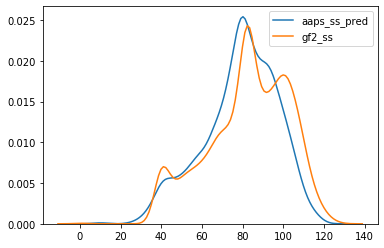

In [36]:
aaps_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(aaps_ss_pred, label='aaps_ss_pred')
sns.kdeplot(X_pred.gf2_ss);

In [37]:
aaps_ss_pred = pd.Series(aaps_ss_pred, index=X_pred.index)

In [38]:
lsl_dr.loc[aaps_ss_pred.index, 'score_adj'] = aaps_ss_pred

# Language

In [39]:
language_data = lsl_dr[(lsl_dr.domain=="Language") 
                       & (lsl_dr.test_name.isin(['CELF-P2', 'OWLS', 'PLS']))
                      & (lsl_dr.age_test>=48) & (lsl_dr.age_test<60)]
language_data.shape

(6921, 247)

In [40]:
regression_subset = language_data[['study_id', 'test_name', 'score', 'age_test', 'sex', 'non_english', 'age_amp', 'age', 'sib']].copy()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(float)
regression_subset = regression_subset.drop('sex', axis=1)

In [41]:
celf_tests = regression_subset[regression_subset.test_name=='CELF-P2']
owls_tests = regression_subset[regression_subset.test_name=='OWLS']
pls_tests = regression_subset[regression_subset.test_name=='PLS']

In [42]:
celf_tests.shape, owls_tests.shape, pls_tests.shape

((3287, 9), (832, 9), (2802, 9))

OWLS to CELF

In [43]:
celf_owls = celf_tests[['study_id', 'score']].merge(owls_tests, on='study_id', suffixes=['_celf', '_owls'])
X = celf_owls.groupby('study_id').mean()
y = X.pop('score_celf')
X = X.fillna(X.mean())

In [44]:
celf_owls_model = linear_model.LinearRegression()
celf_owls_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
X_pred = language_data.loc[language_data.test_name=='OWLS', ['score', 'age_test', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred = X_pred.fillna(X_pred.mean())

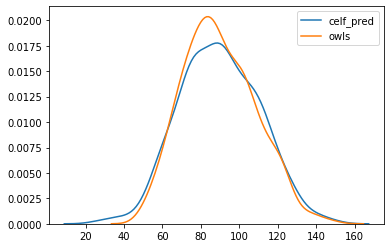

In [46]:
celf_owls_pred = celf_owls_model.predict(X_pred)
sns.kdeplot(celf_owls_pred, label='celf_pred')
sns.kdeplot(X_pred.score, label='owls');

In [48]:
celf_owls_pred = pd.Series(celf_owls_pred, index=X_pred.index)

In [49]:
lsl_dr.loc[celf_owls_pred.index, 'score_adj'] = celf_owls_pred

PLS to CELF

In [50]:
celf_pls = celf_tests[['study_id', 'score']].merge(pls_tests, on='study_id', suffixes=['_celf', '_pls'])
X = celf_pls.groupby('study_id').mean()
y = X.pop('score_celf')
X = X.fillna(X.mean())

In [51]:
celf_pls_model = linear_model.LinearRegression()
celf_pls_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
X_pred = language_data.loc[language_data.test_name=='PLS', ['score', 'age_test', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred = X_pred.fillna(X_pred.mean())

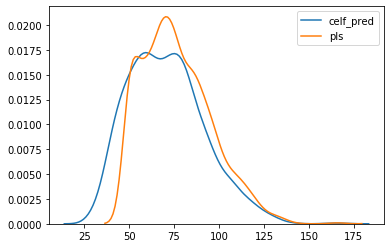

In [53]:
celf_pls_pred = celf_pls_model.predict(X_pred)
sns.kdeplot(celf_pls_pred, label='celf_pred')
sns.kdeplot(X_pred.score, label='pls');

In [54]:
celf_pls_pred = pd.Series(celf_pls_pred, index=X_pred.index)

In [55]:
lsl_dr.loc[celf_pls_pred.index, 'score_adj'] = celf_pls_pred

In [57]:
lsl_dr.to_csv('../data/clean/lsl_dr_frozen_09272019.csv', index=False)